# Causes for Flight Delays in the US from 2010-2020
## by Jordan Mazza

## Preliminary Wrangling

> I will be analysing the Flight dataset provided in the Udacity project portal. I downloaded data for flight delay causes from June 2003 (the earliest available on the website) to September 2020.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pywaffle import Waffle


%matplotlib inline

In [8]:
df = pd.read_csv('/Users/jordanmazza/Desktop/Udacity Files/Project 5/Final Submission/airline_delay_causes.csv')
# df.info()
# df.shape

In [9]:
# some column names have whitespace so I need to strip these columns
df.columns = df.columns.str.strip()
# df.info()
# df.shape

### Dataset Structure

> My dataset has 288,150 rows and 22 columns. Most variables in my dataset are numeric, more specifically continuous quantitative data. There are a few numeric qualitative variables such as the month and year columns, as well as descriptive columns such as the carrier name and airport code columns. The bulk of the dataset are made of columns ending in ending in `_ct` and `delay`. The columns ending in `_ct` show the total number of flights delayed due to that specific reason, while the columns ending in `delay` show how many minutes those delays were in total.
>
> There are five causes for delays represented in this data set, some of which are self-explanatory such as `weather`, `security` and `late_aircraft` delays. Some are a bit more confusing. `nas` delays are caused by issues with the NAS, or National Aviation Services. These include services such as plane taxing, passenger and ramp services and luggage/cargo handling. Lastly `carrier` delays have to do with problems with the airplane such as plane maintenance or laboratory issues. These meanings were found using the links provided by Udacity to the source's descriptions as well as from mentor answers on Udacity's Knowledge page.

### Main Interests

> I would like to see if weather delays are influenced by time of year (based on the `month` column). I would imagine that during the winter months (especially in airports located in cold climates) there would be more weather delays, so I would like to explore that as well.
>
> I am also curious to see if the amount of flight delays has changed overtime. I would imagine for the year 2020, there will be much fewer flight delays because there are less flights in general and with a decreased flying population, operations can run more smoothly.
>
>I would also like to see what proportion of flights in the dataset are delayed and what proportion are on time. Further examining this, I would like to see the proportion of the causes of all delayed flights in the dataset.
>
> I am planning on making a heat map, the correlations among the amount of certain delay types variables. From there I will assess where the strongest correlations lie and explore them further. I hypothesize that, late aircraft delays, will have strong correlations with both weather delays and carrier delays.

### Useful Features

> Most columns in this dataset will be useful for my analyses, specifically, the delay count columns and delay durations columns. Both of these variables show a different side of each of the 5 delay reasons and therefore will be informative to see how their relationships differ and/or correlate.
>
> Some of the features I'm interested in also relate to time, like monthly and year trends. Because of this, the `month` and `year` columns will be useful in these analyses.
>
> The columns relating to airports will also be useful to see if certain locations or certain airlines are more reliable (less delays overall) than others.

In [10]:
df = df.query('year >= 2010').sort_values(['year', 'month'])
# df.head()

In [11]:
df = df.rename(columns={"arr_flights": "flights_total", 
                   "arr_del15": "flights_delayed_total",
                   "arr_cancelled": "flights_cancelled",
                   "arr_diverted": "flights_diverted"})
df = df.drop(columns = ['carrier', 'airport_name', 'Unnamed: 21'])
df.head()
df.shape

(171396, 19)

## Univariate Exploration

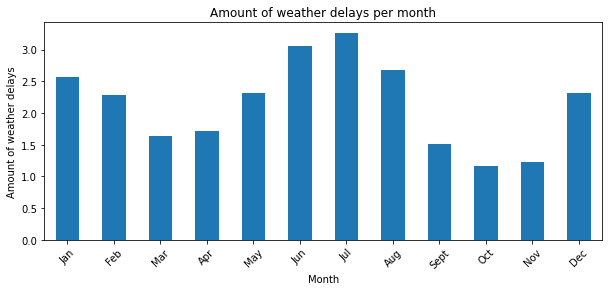

In [52]:
plt.figure(figsize = [10,4])
weather_count = df.groupby('month')['weather_ct'].mean()
weather_count.plot(kind='bar', x='month')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
           rotation = 45)
plt.xlabel('Month')
plt.ylabel('Amount of weather delays')
plt.title('Amount of weather delays per month');

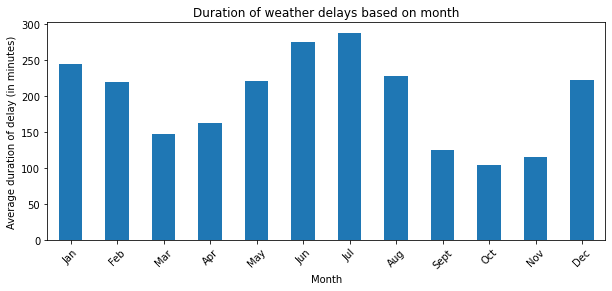

In [241]:
weather_time = df.groupby('month')['weather_delay'].mean()
plt.figure(figsize = [10,4])
weahter_time.plot(kind='bar', x='month')
plt.xlabel('Month')
plt.ylabel('Average duration of delay (in minutes)')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
           rotation = 45)
plt.title('Length of weather delays per month');

> The first bar plot above displays the number of flights delayed because of weather per month. As mentioned in the introduction, I suspected winter months to have more weather delays than any other season. From this plot, however, this doesn't seem to be the case. While weather delays are high in January, February, and March, summer months have the most weather delays.
>
> Because of this, I also made a bar plot showing the duration of weather delays per month. This plot show delays are typically longer in winter months as well as, interestingly, summer months.
>
> Moving forward from this analysis, I would be curious if there was a correlation between weather delays and delays caused by late aircrafts. I'm interested in this because in my experience flying, it's common to suffer from a delay due to a late aircraft because that aircraft was coming from a place with a weather delay. I am also interested to pick a few airports in locations that have harsh winters to see if, in those locations, weather delays increase in the winter months.

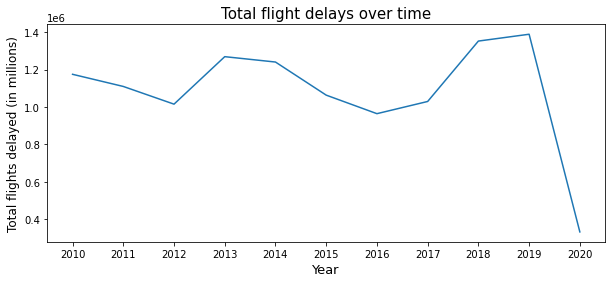

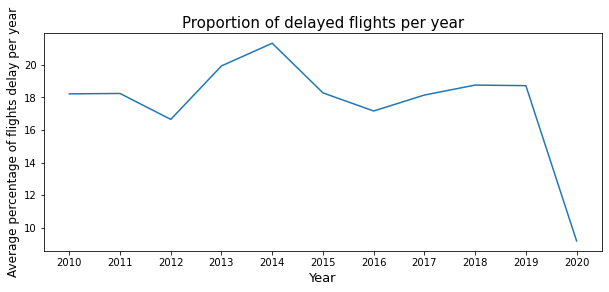

In [55]:
# Total Count of Flight Delays
delay_timeline = df.groupby('year', as_index=False)[['flights_delayed_total', 'flights_total']].sum()

delay_timeline.plot(kind='line', x='year', y='flights_delayed_total', figsize=(10,4), legend=False)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Total flights delayed (in millions)', fontsize=12)
plt.xticks(ticks = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.title('Total flight delays over time', fontsize=15)

# Percentage of Flights Delayed
delay_timeline['delays_perct'] = 100 * delay_timeline['flights_delayed_total'] / delay_timeline['flights_total']
delays = delay_timeline.groupby('year', as_index=False)['delays_perct'].mean()
delays
delays.plot(kind='line', x='year', y='delays_perct', figsize = (10,4), legend=False)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Average percentage of flights delay per year', fontsize=12)
plt.xticks(ticks = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.title('Proportion of delayed flights per year', fontsize=15);

> I was curious to see if flight delays have changed overtime, so I used the group by function to create groups of years and then took the sum of total delayed flights. It is unsurprising to find the year 2020 to have a significant drop in flight delays. Because travel has ceased for many Americans this year, they are less flights in general; therefore, there are less flight delays. I wanted to see if this significant drop would still be present when looking at the percentage of flights delayed per year. So, I made a new column that was the proportion of flights delayed out of the total flights and then grouped by year again. According to the second line plot, it's apparent the significant decrease in flight delays is not only caused by a decrease in flights in general, but something else as well. I would assume one reason for this is airports and airlines have a greater ability to space out resources and communicate better due to the decrease in the flying population.

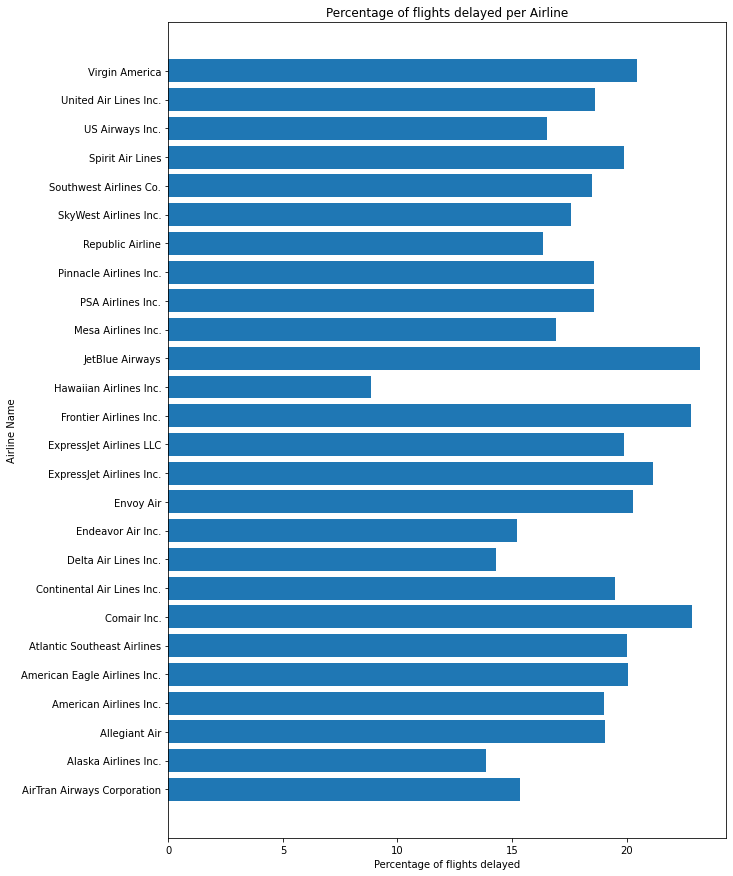

In [7]:
airlines = df.groupby('carrier_name', as_index=False)[['flights_delayed_total', 'flights_total']].sum()
airlines['delay_perct'] = 100 * airlines['flights_delayed_total'] / airlines ['flights_total']

plt.figure(figsize=[10,15])
plt.barh(data=airlines, y='carrier_name', width='delay_perct')
plt.ylabel('Airline Name') 
plt.xlabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed per Airline');

> This horizontal bar plot shows the percentages of delayed flights by airline. I was curious if certain airlines, regardless of location, were more reliable in terms of flight punctuality. According to this graph, there is, in fact, some variation among airlines in terms of flight delays, Hawaiian Airlines seeming to be the most reliable, and Jet Blue, the least. While this is interesting, there could be other variables effecting this graph, such as number of locations (as well as what those locations are) that can play into this result.

In [252]:
#Set up for Following Waffle Plot
total_flights = df.flights_total.sum()
total_flights

flights_delayed = round(100 * df.flights_delayed_total.sum() / total_flights)
flights_diverted = round(100 * df.flights_diverted.sum() / total_flights)
flights_cancelled = round(100 * df.flights_cancelled.sum() / total_flights)
flights_on_time = 100 - (flights_delayed + flights_diverted + flights_cancelled)

print(flights_delayed,
      flights_diverted,
      flights_cancelled,
      flights_on_time)

18.0 0.0 2.0 80.0


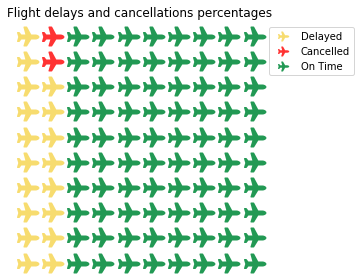

In [52]:
#proportions of flights that were delayed, diverted, cancelled, or on time

data = {'Delayed': 18, 'Cancelled': 2, 'On Time':80}
fig = plt.figure(FigureClass=Waffle,rows=10, values=data, 
                 colors=("#F7DC6F", "#FF3333", "#229954"),
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
                 icons='plane', icon_size=20, icon_legend=True)
plt.title('Flight delays and cancellations percentages');

> This waffle plot shows the proportions of flights in the dataset that were delayed, cancelled, and on time. According to this plot, 80% of flights over the past 10 years have been on time while 18% of flights were delayed, 2% cancelled. Since the percentage of flights diverted was such a small number (0.2%), it didn't show up on the visualization, so I removed it from the graph. Waffle plot are an incredible tool to use when communicating proportions and while they can be distorted like pie charts, they are a much more simplistic and visually comprehendible way of communicating this information.

In [275]:
#Set up for Following Waffle Plot
delayed_total = df.flights_delayed_total.sum()
delayed_total

weather_ct = round(100 * df.weather_ct.sum() / delayed_total)
carrier_ct = round(100 * df.carrier_ct.sum() / delayed_total)
nas_ct = round(100 * df.nas_ct.sum() / delayed_total)
security_ct = round(100 * df.security_ct.sum() / delayed_total)
late_aircraft_ct = round(100 * df.late_aircraft_ct.sum() / delayed_total)

print(weather_ct,
      carrier_ct,
      nas_ct,
      security_ct,
      late_aircraft_ct)

3.0 29.0 31.0 0.0 37.0


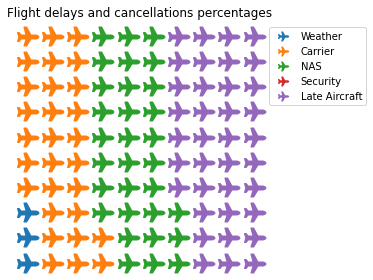

In [53]:
# percentages of causes for delay
colors = sb.color_palette()[0:5]
data = {'Weather': 3, 'Carrier': 29, 'NAS':31, 'Security': 0, 'Late Aircraft': 37}
fig = plt.figure(FigureClass=Waffle,rows=10, values=data, 
                 colors = colors,
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
                 icons='plane', icon_size=20, icon_legend=True)
plt.title('Flight delays and cancellations percentages');

> Similar to the last plot, this waffle plot shows the proportions of the delay causes among all delayed flights in the dataset. According to this plot, it is clear the most common reason for delayed is a late aircraft, followed by nas delays, then carrier delays.  Again, the percentage of delays caused by security is so small it doesn't show up in the graph. Surprisingly, weather is not the main cause of delays; in facts, it's the second smallest cause.

In [43]:
# print(np.log10(df.weather_ct.describe()))
# print(np.log10(df.carrier_ct.describe()))
# print(np.log10(df.nas_ct.describe()))
# print(np.log10(df.security_ct.describe()))
# print(np.log10(df.late_aircraft_ct.describe()))

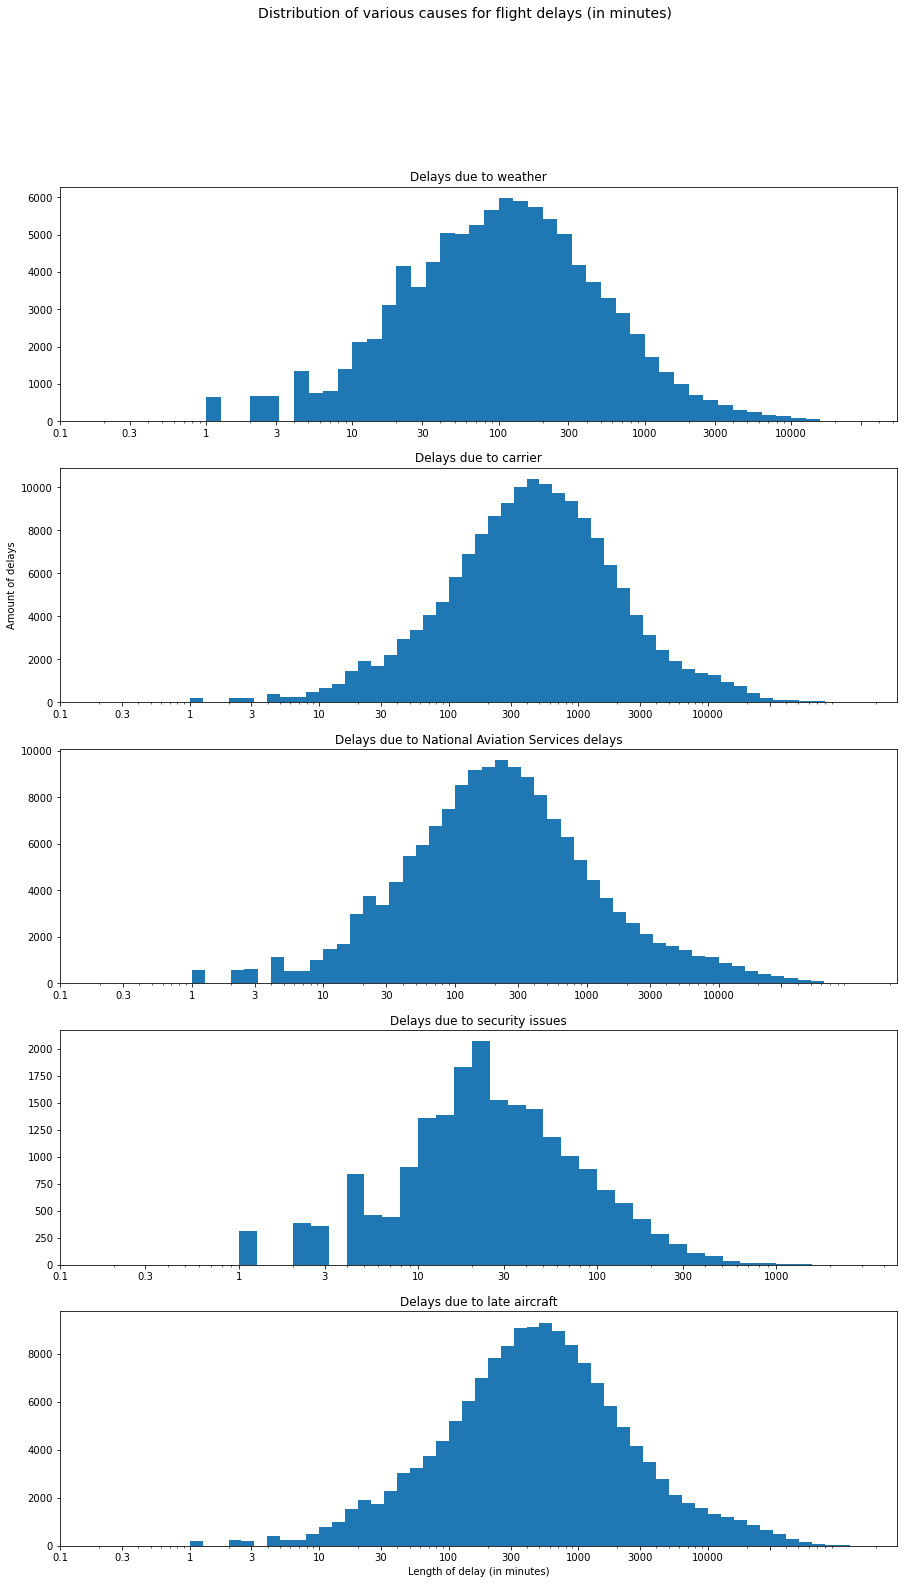

In [41]:
fig, ax = plt.subplots(nrows=5, figsize = [15,25])
bins0 = 10** np.arange(0, 4.5+0.1, 0.1)
bins1 = 10** np.arange(0, 5.2+0.1, 0.1)
bins2 = 10** np.arange(0, 5.1+0.1, 0.1)
bins3 = 10** np.arange(0, 3.5+0.1, 0.1)
bins4 = 10** np.arange(0, 5.2+0.1, 0.1)

ax[0].hist(data=df, x='weather_delay', bins=bins0)
ax[0].set_xscale('log')
ax[0].set_xticks([0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000])
ax[0].set_xticklabels(['0.1', '0.3', '1', '3', '10', '30', '100', '300', '1000', '3000', '10000'])
ax[0].set_title('Delays due to weather')

ax[1].hist(data=df, x='carrier_delay', bins=bins1)
ax[1].set_xscale('log')
ax[1].set_xticks([0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000])
ax[1].set_xticklabels(['0.1', '0.3', '1', '3', '10', '30', '100', '300', '1000', '3000', '10000'])
ax[1].set_title('Delays due to carrier')

ax[2].hist(data=df, x='nas_delay', bins=bins2)
ax[2].set_xscale('log')
ax[2].set_xticks([0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000])
ax[2].set_xticklabels(['0.1', '0.3', '1', '3', '10', '30', '100', '300', '1000', '3000', '10000'])
ax[2].set_title('Delays due to National Aviation Services delays')

ax[3].hist(data=df, x='security_delay', bins=bins3)
ax[3].set_xscale('log')
ax[3].set_xticks([0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000])
ax[3].set_xticklabels(['0.1', '0.3', '1', '3', '10', '30', '100', '300', '1000'])
ax[3].set_title('Delays due to security issues')

ax[4].hist(data=df, x='late_aircraft_delay', bins=bins4)
ax[4].set_xscale('log')
ax[4].set_xticks([0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000])
ax[4].set_xticklabels(['0.1', '0.3', '1', '3', '10', '30', '100', '300', '1000', '3000', '10000'])
ax[4].set_xlabel('Length of delay (in minutes)')
ax[1].set_ylabel('Amount of delays')
ax[4].set_title('Delays due to late aircraft')
fig.suptitle('Distribution of various causes for flight delays (in minutes)', fontsize=14);

> The series of histograms above show the distribution of the duration of delays based on the five delay causes. All these distributions when originally graphed were extremely right skewed with long tails, so I used a logarithmic scale to transform the data to be more readable. From these histograms, it seems most causes for delays have a normal curve distribution (maybe slightly left skewed) with most causes averaging around 300 minutes delays, or 5 hours. We can also see that the most delay types with the longest average time are carrier, and NAS delays.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I originally wanted to analyze data from 2003 to 2020; however, the dataset is incredibly large, and my analyses and plots have been taking a significant amount of time to run. So, I decided to clip the dataset and only analyze data past ten years.
>
> I later further decided that I wanted to exclude the year 2020 from my analysis since this year has been particularly abnormal (especially in relation to people traveling and flying) I would imagine since there are so many less people traveling, there are less flights and less delays. So, my dataframe ended with data from 2010 to 2019, leaving me with 171,396 rows.
>
> There were 22 columns in the dataset, and I wasn't able to see all the columns at once. I also noticed some of these columns were not relevant to my features of interest. Because of this, I removed some irrelevant columns from the data frame.
>
> Overall, in this first set of analyses, all the plots were straight forward and did not need to be transformed or scaled, until I reached the last visualization in the section where I plotted histograms for all 5 delay causes variable. As described earlier, each chart was drastically right skewed and long thin tails, so I used a log10 scalar on the x-axis to better visualize the data. Once I did this for each histogram and fixed the bin boundaries as well as the xtick and xticklabels, the graphs were finally comprehensible.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I originally wanted to analyze data from 2003 to 2020; however, the dataset is incredibly large, and my analyses and plots have been taking a significant amount of time to run. So, I decided to clip the dataset and only analyze data past ten years.
>
> I later further decided that I wanted to exclude the year 2020 from my analysis since this year has been particularly abnormal (especially in relation to people traveling and flying) I would imagine since there are so many less people traveling, there are less flights and less delays. So, my dataframe ended with data from 2010 to 2019, leaving me with 171,396 rows.
>
> There were 22 columns in the dataset, and I wasn't able to see all the columns at once. I also noticed some of these columns were not relevant to my features of interest. Because of this, I removed some irrelevant columns from the data frame.

## Bivariate Exploration

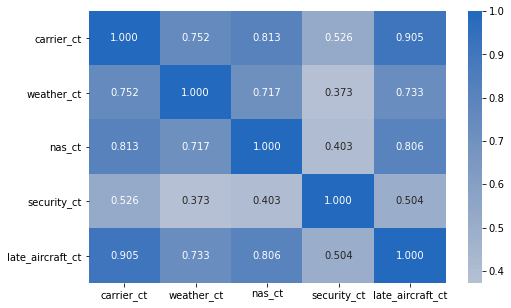

In [13]:
plt.figure(figsize = [8, 5])
sb.heatmap(df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].corr(),
           annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

> Above is a heat map showing correlations between all columns with information of total amount of delays due to the 5 causes. The strongest correlations are between carrier and late aircraft, NAS and carrier, late aircraft and NAS, and weather and late aircraft. 

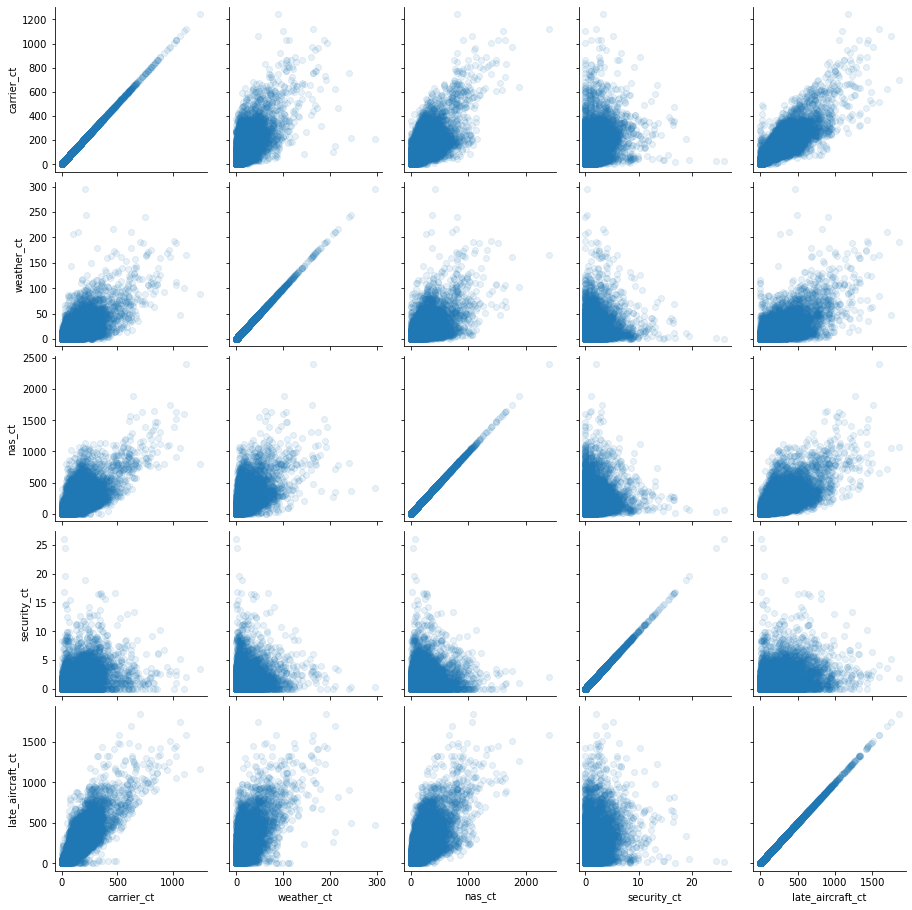

In [240]:
g = sb.PairGrid(data = df, vars = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'])
g = g.map(plt.scatter, alpha=0.1)

> This PairGrid plot shows very similar result as the heatmap before it, just in a slightly different way. It shows strong positive correlations between variables such as weather, nas, late aircraft, and carrier. I am curious to see later on if there is any relationship when I compare there of these to each other.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The positive correlations displayed in these scatterplots make sense. Delays in one location in the country are bound to effect delays in other locations. So, if one place is experiencing a weather delay, its destination location might then experience a late aircraft delay in response to the weather delays. So, when weather delays increase, it makes sense that late aircraft delays would increase as well.
>
> I would assume this reasoning is similar for the other strong correlations in this dataset. For example, if there are a lot of carrier delays overall one month, it would make sense there would overall be a lot of late aircraft delays that same month. I'll continue to look at some of these correlations in the next section to see if any of these independent relationships interact and overlap with one another.

## Multivariate Exploration

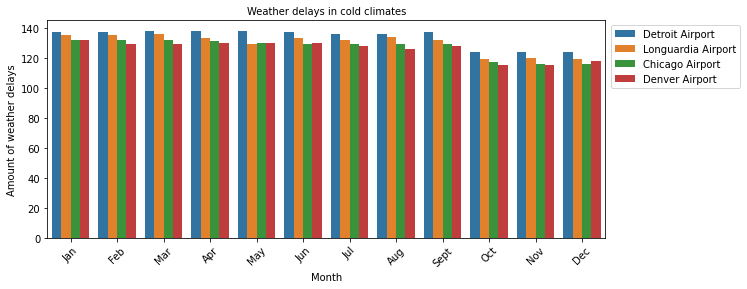

In [61]:
#cold weather airports
cold_airports = df.query('airport == "ORD" | airport == "LGA" | airport == "DEN" | airport == "DTW"')

plt.figure(figsize = [10,4])
sb.countplot(data=cold_airports, x='month', hue='airport')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
           rotation = 45, fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Amount of weather delays', fontsize=10)
plt.title('Weather delays in cold climates', fontsize=10)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1), ncol=1,
           labels = ['Detroit Airport', 'Longuardia Airport', 'Chicago Airport', 'Denver Airport'], fontsize=10);

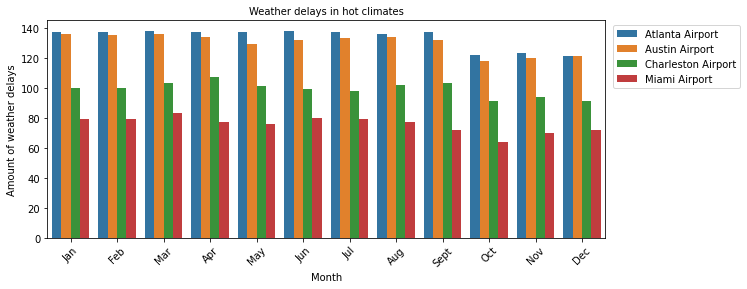

In [58]:
#warm weather airports
hot_airports = df.query('airport == "AUS" | airport == "ATL" | airport == "MIA" | airport == "CHS"')

plt.figure(figsize = [10,4])
sb.countplot(data=hot_airports, x='month', hue='airport')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
           rotation = 45, fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Amount of weather delays', fontsize=10)
plt.title('Weather delays in hot climates', fontsize=10)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1), ncol=1,
           labels = ['Atlanta Airport', 'Austin Airport', 'Charleston Airport', 'Miami Airport'], fontsize=10);

> These charts display the relationship between total weather delays, location, and time of year. The first plot for colder climate locations such as Chicago, Denver, and New York. I chose these locations because I wanted to see if places susceptible snowstorms and heavy fog during the winter months experienced more weather delays during those months. The second plot second plot shows warmer weather and more tropical climates. I wanted to see if locations susceptible to thunderstorms, hurricanes, and other tropical storms experienced more weather delays during the summer months.

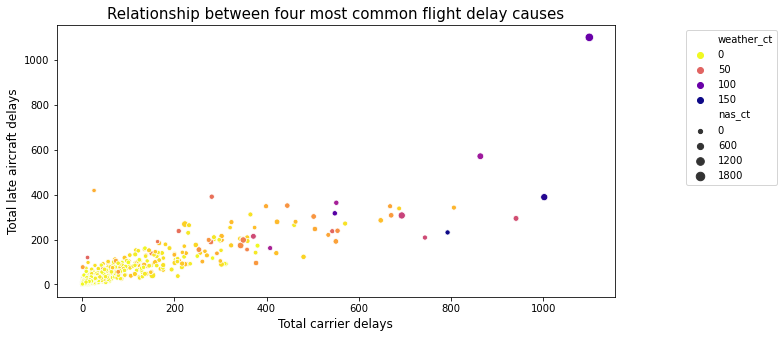

In [238]:
samples = np.random.choice(df.shape[0], 5000, replace = False)
df_samp = df.reindex(samples) 
df_samp.dropna(inplace=True)

plt.figure(figsize = [10 , 5])
sb.scatterplot(data=df_samp, x='late_aircraft_ct', y='carrier_ct',
               size='nas_ct', hue='weather_ct', palette = 'plasma_r')
plt.xlabel('Total carrier delays', fontsize=12)
plt.ylabel('Total late aircraft delays',fontsize=12)
plt.title('Relationship between four most common flight delay causes', fontsize=15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.3,1));

> The scatterplot above shows the four-way relationship between the four most prominent flight delay causes. Security delays were not added to this graph because in comparison to the other variables, security delays happen far less frequently and because of this, scaling the graph to see the effects of security delays without diminishing the effects of the other four variables would be difficult. In the plot, carrier and late aircraft delays are shown on the x and y axes. Weather delays are portrayed by the color of the marker, deepening as total weather delays increase. Finally, nas delays re portrayed by marker size, getting larger as the delays become more frequent. From this graph, it seems all four variables share outliers, meaning when one variable has a particularly large amount of delays, so do the other three. This is best shown by the point in the upper right-hand corner of the graph.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Earlier in this analysis, I hypothesized that there will be more weather delays in winter months then warmer months, especially in colder locations, has once again been disproven. In this section, I created  to two plots to test this theory, one for locations in cold climates and one with more tropical climate locations. Regardless of month, the airports located in some of the coldest climates in the country tend to have a consistent amount of weather delayed flights throughout the whole year. This also is true to locations in the country that tend to have a lot of thunderstorms and tropical storms. There seems to be no strong interaction between location, time of year influencing and amount of weather delays. 
>
>If anything, these plots showed that there may instead be a strong relationship between a specific location and flight delays in general. since the amount of weather delays was not affected by time of year for each location, the reason certain airports have more weather delays could be based simply on that airport being larger in size. Since there are so many airports represented in this dataframe (391) plotting flight delays for each location would take up a lot of time and would be difficult to visualize; however, it is something interesting to note moving forward from this project.

### Were there any interesting or surprising interactions between features?

> In the final plot of this project, it seems there is a four-way interaction between delays relating to carriers, weather, nas issues, and late aircrafts. While it may not be a statistically significant interaction, all these variables increase at a similar rate. This is most easily seen between late aircraft and carrier delays. It makes sense this relationship would be the strongest when referring back to the heatmap and PairedGrid. These two variables had a strong correlation of 0.905. There also seems to be a slight correlation for weather against these two variables. As the two variables increase, weather delays also seem to increase as seen by the darkening of colors. The weakest variable in this relationship is nas issues with the other variables. This variable relationship is displayed by the size of the marker on the scatterplot, and while there are slight size variations (marginally increasing over time), this effect is by far the smallest out of the four variables.